In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from sklearn.random_projection import SparseRandomProjection
from sklearn.model_selection import cross_val_score

from sklearn.mixture import GaussianMixture

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kurtosis
import math
from sklearn.metrics import silhouette_samples, silhouette_score, mean_squared_error, accuracy_score
from sklearn.neural_network import MLPClassifier

import seaborn as sns



import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics

In [2]:
spamHeader = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 
'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 
'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 
'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 
'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#', 'average', 'longest', 'total' , 'spam' ]

wine = pd.read_csv("data/wine/winequality-white.csv" , sep=';')
spam = pd.read_csv("data/spam/spambase.data", header=None, names=spamHeader)

wineHeader = wine[:-1].columns

In [3]:
wineHeader

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

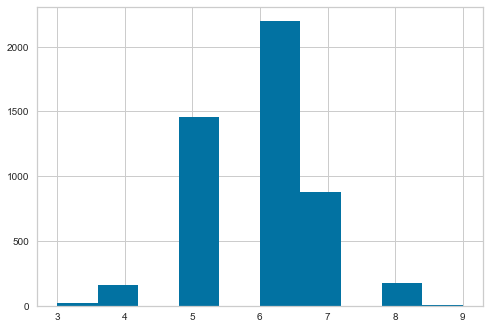

In [4]:
conditions = [
    (wine['quality'] <= 6),
    (wine['quality'] > 6) 
    ]
values = [0, 1]
wine['good_quality'] = np.select(conditions, values)
wine['quality'].hist()

wineY = wine['good_quality']
wineYmany = wine['quality']
wineX = wine.drop(columns=['good_quality','quality'])

In [5]:
spamX = spam.iloc[: , :-1]
spamY = spam.iloc[: , -1]

In [6]:
scaler = MinMaxScaler()
wineXScaled = scaler.fit_transform(wineX)
spamXScaled = scaler.fit_transform(spamX)

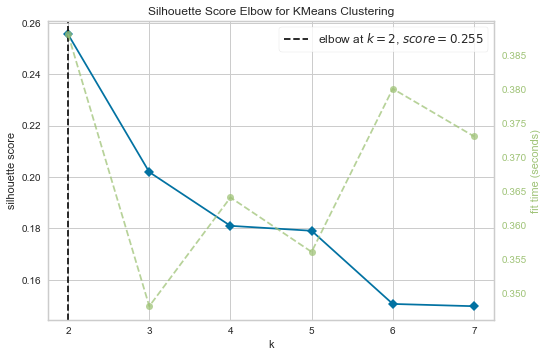

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [7]:
pca = PCA(n_components= 8).fit(wineXScaled)
X_pca = pca.transform(wineXScaled)

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,8), metric='silhouette', timings=True
)

visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [8]:
random_projection = SparseRandomProjection(n_components=9)
random_projection.fit(wineXScaled)
random_projection.fit(wineXScaled)
components =  random_projection.components_.toarray() # shape=(5, 11) 
p_inverse = np.linalg.pinv(components.T) # shape=(5, 11) 

#now get the transformed data using the projection components
reduced_data = random_projection.transform(wineXScaled) #shape=(4898, 5) 
reconstructed= reduced_data.dot(p_inverse)  #shape=(4898, 11) 

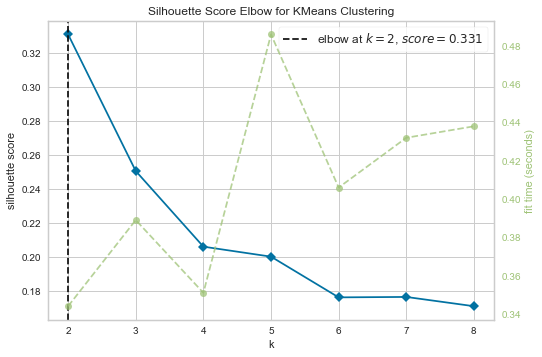

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,9), metric='silhouette', timings=True
)

visualizer.fit(reduced_data)        # Fit the data to the visualizer
visualizer.show()   

In [12]:
copy = wineX
wineDrop = copy.drop(columns=['residual sugar','fixed acidity'])

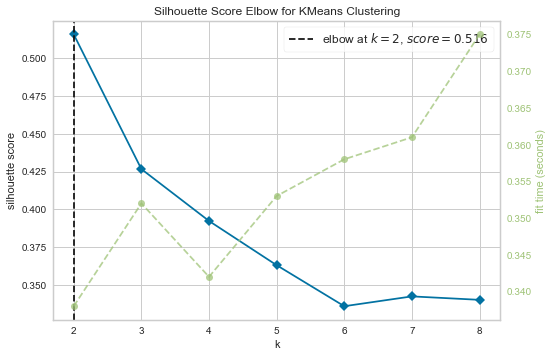

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,9), metric='silhouette', timings=True
)

visualizer.fit(wineDrop)        # Fit the data to the visualizer
visualizer.show()  

In [14]:
ica = FastICA(n_components=11, max_iter=10000, tol=0.1).fit(wineXScaled)
X_ica = ica.fit_transform(wineXScaled) 

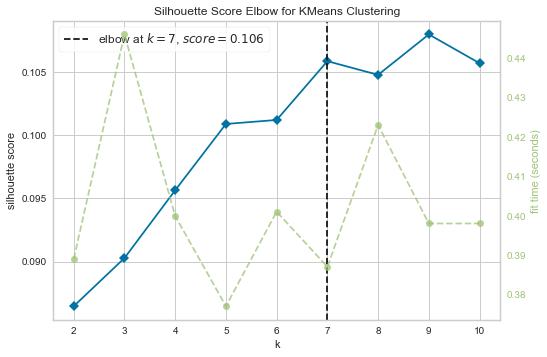

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='silhouette', timings=True
)

visualizer.fit(X_ica)        # Fit the data to the visualizer
visualizer.show()  

C:\Users\Luan\AppData\Local\Temp/ipykernel_21296/179761130.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,12), S, 'bo-', color='black')


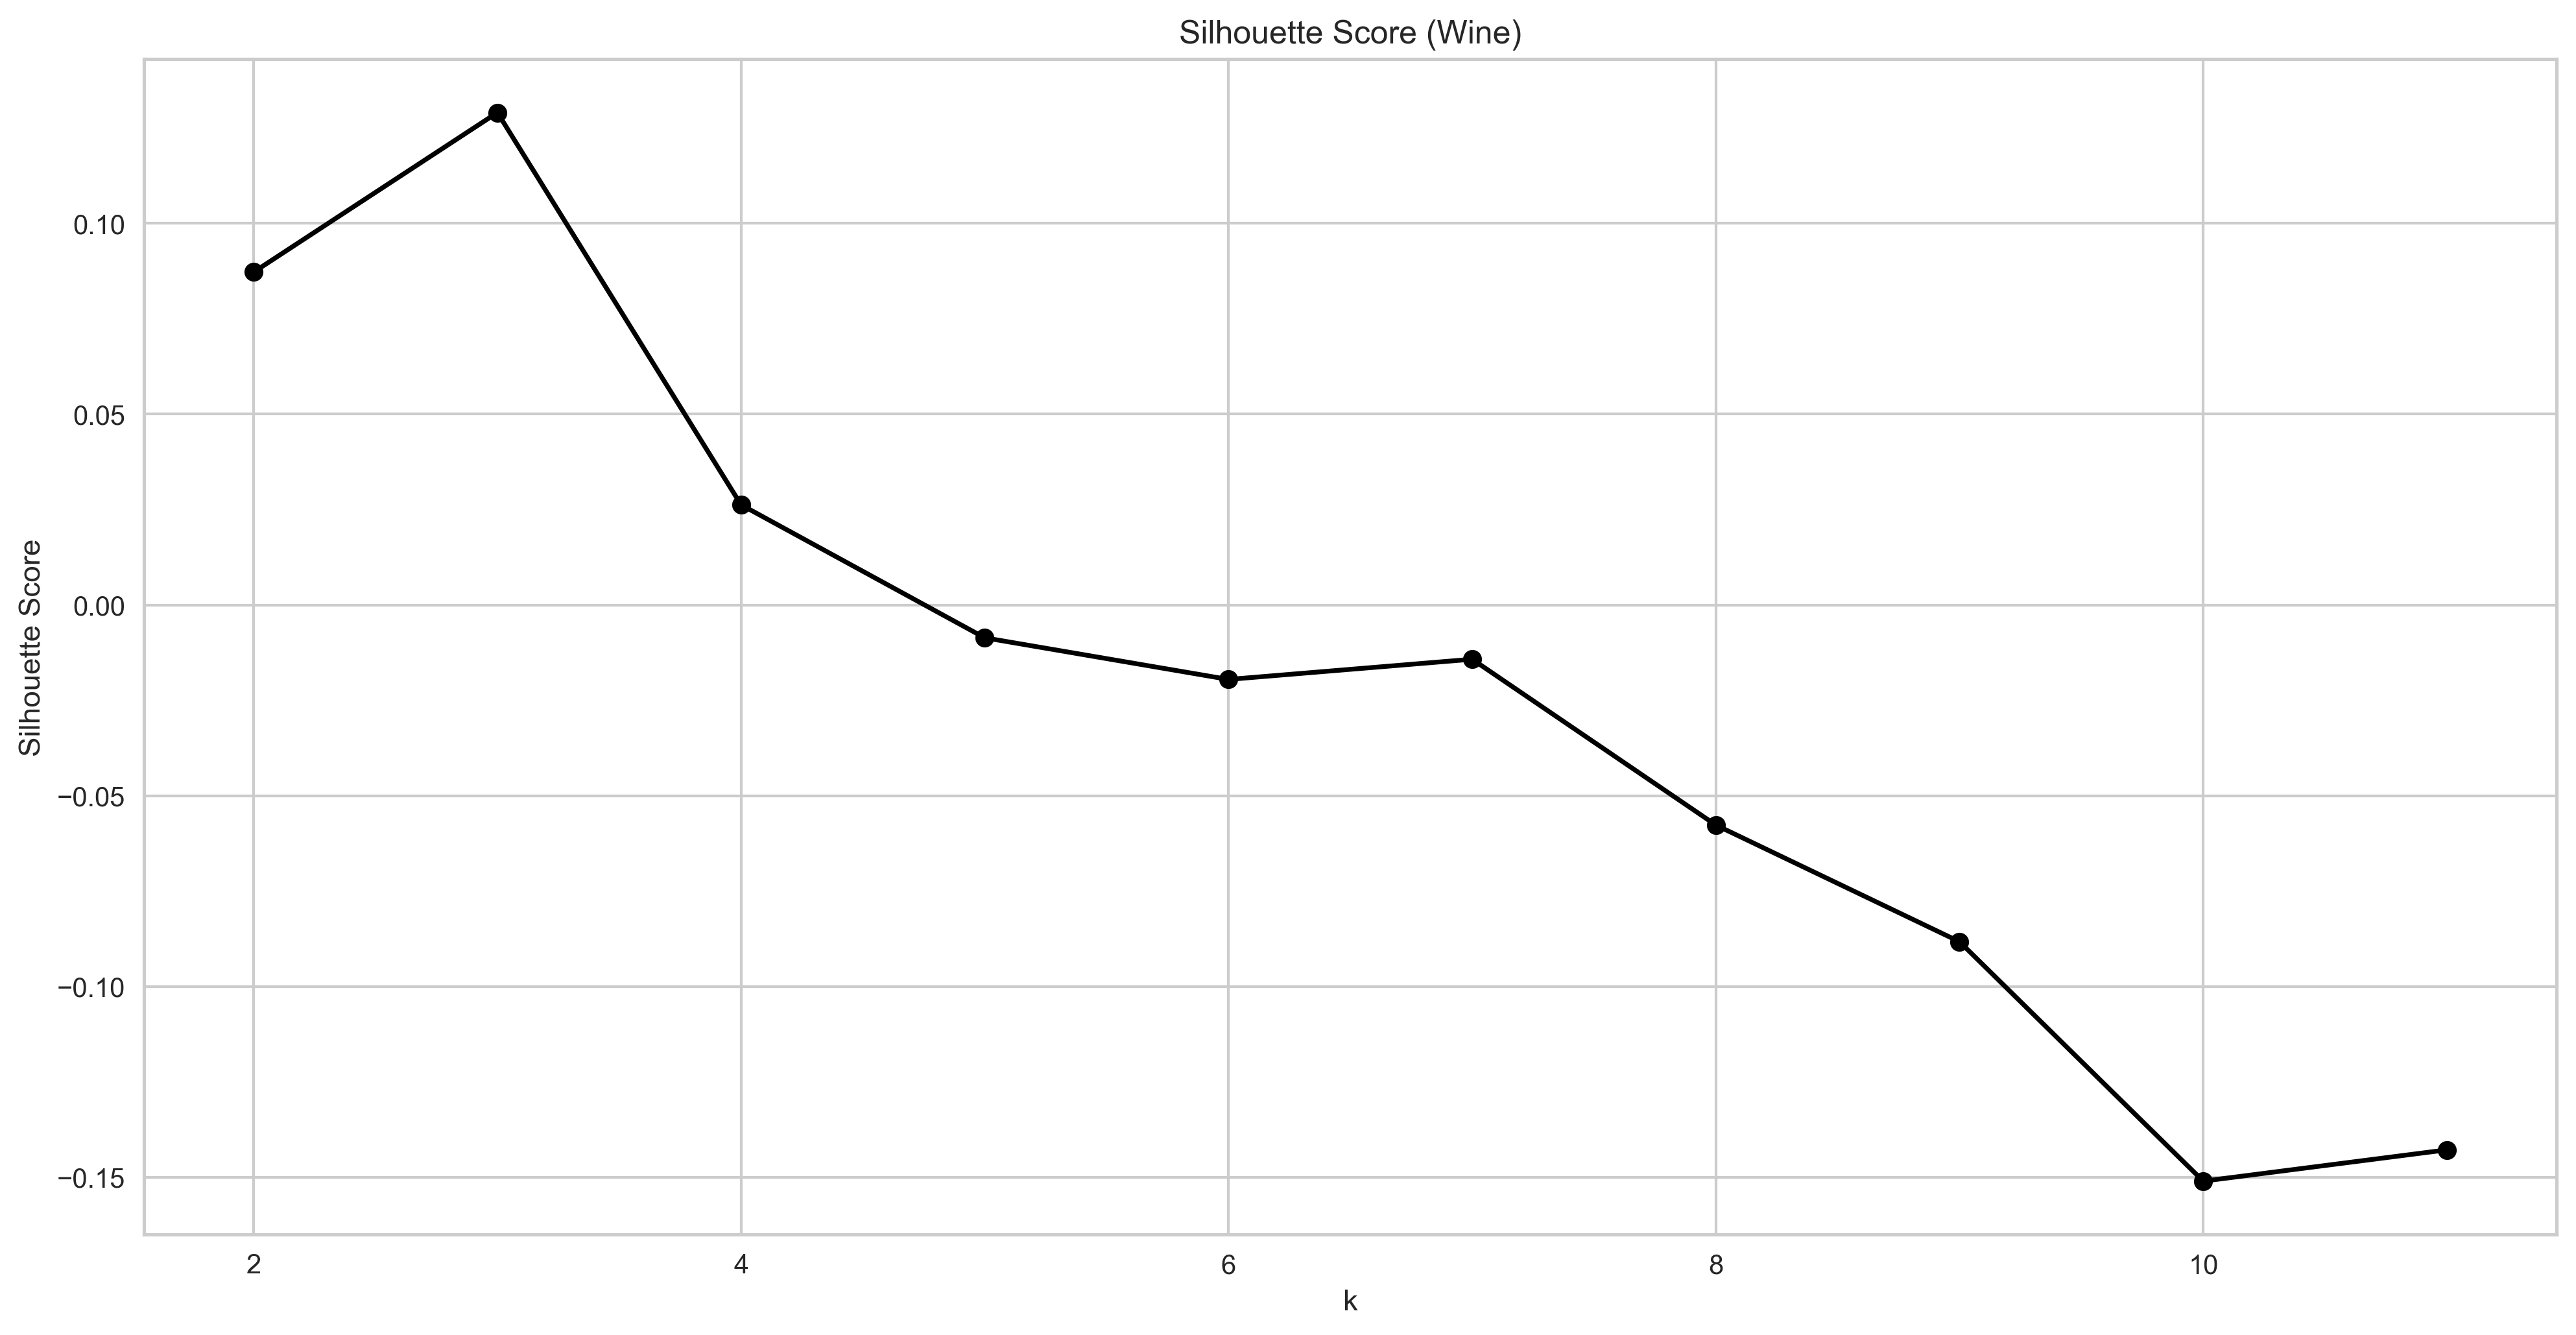

In [17]:
S= []
for k in range(2,12):
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(wineDrop)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(wineDrop, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(range(2,12), S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (Wine)')
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(spamXScaled, spamY, test_size=0.25)
spamcfl =DecisionTreeClassifier(ccp_alpha=0.0002, criterion='entropy', max_depth=15,
                       min_samples_leaf=2)
spamcfl.fit(X_train,y_train)
spamcfl.feature_importances_ 

spamSel = pd.Series(spamcfl.feature_importances_, index=spamHeader[:-1])




In [22]:
spamSel.sort_values(ascending=False)
spamSel.value_counts()
spamSel = spamSel[spamSel!=0]

copy =spamX 
spamDrop = copy.drop(columns=spamSel.index)
spamDrop

,3d,addresses,email,credit,font,650,lab,telnet,857,415,parts,direct,cs,project,table,conference,[,#
0,0.0,0.00,1.29,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000
1,0.0,0.14,0.28,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.048
2,0.0,1.75,1.03,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.0,0.00,0.0,0.0,0.0,0.010
3,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000
4,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.31,0.0,0.0,0.0,0.000
4597,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000
4598,0.0,0.00,0.90,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.000
4599,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.32,0.0,0.0,0.0,0.000


In [23]:
X_train, X_test, y_train, y_test = train_test_split(spamDrop, spamY, test_size=0.2)
start= time.time()
model = KMeans(n_clusters = 2)
a = model.fit(X_train)
train = accuracy_score(a.labels_, y_train)
b = model.predict(X_test)
test =  accuracy_score(b, y_test)
end= time.time()
print('Train Score: ', train)
print('Test Score: ', test)
print('Time to execute:', end -start)

Train Score:  0.6043478260869565
Test Score:  0.6199782844733985
Time to execute: 0.419996976852417


In [35]:
def estimateScore(estimator, xTrain,yTrain,xTest,yTest, name):

    start = time.time()
    clf = estimator.fit(xTrain,yTrain)
    end = time.time()
    fit = end-start
    
    y_predTrain = clf.predict(xTrain)
    
    start = time.time()
    y_predTest = estimator.predict(xTest)
    end = time.time()
    pred = end - start
    
    model_name = type(estimator).__name__
    scoreTrain = accuracy_score(y_predTrain, yTrain )
    scoreTest = accuracy_score(y_predTest, yTest)
    
    print("Result from "+ model_name +" for "+name+":")
    print("Train Accuracy:", scoreTrain)
    print("Test Accuracy:", scoreTest)
    print("Time to fit for: " +str(fit))
    print("Time to predict for: " + str(pred))
def splitData(dataX, dataY, percentage):
    dataXTrain, dataXTest, dataYTrain, dataYTest = train_test_split(
        dataX,dataY, test_size=percentage, random_state=0)
    return dataXTrain, dataXTest, dataYTrain, dataYTest


In [47]:
wineNN = MLPClassifier(hidden_layer_sizes = 20, learning_rate_init= 0.01)
spamNN  = MLPClassifier(hidden_layer_sizes = 8, learning_rate_init= 0.1)


In [52]:
print("Tuned NN")
wineXTrain, wineXTest, wineYTrain, wineYTest = splitData(
    wineXScaled,wineY, 0.25)
estimateScore(wineNN,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')



Tuned NN
Result from MLPClassifier for wine:
Train Accuracy: 0.8213994010345766
Test Accuracy: 0.8155102040816327
Time to fit for: 1.556999683380127
Time to predict for: 0.0010004043579101562


C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
print("ICA NN")
wineXTrain, wineXTest, wineYTrain, wineYTest = splitData(
    X_ica,wineY, 0.25)
estimateScore(wineNN,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')


ICA NN
Result from MLPClassifier for wine:
Train Accuracy: 0.814320718758508
Test Accuracy: 0.8073469387755102
Time to fit for: 1.497999668121338
Time to predict for: 0.0


C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
print("PCA NN")
wineXTrain, wineXTest, wineYTrain, wineYTest = splitData(
    X_pca,wineY, 0.25)
estimateScore(wineNN,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

PCA NN
Result from MLPClassifier for wine:
Train Accuracy: 0.8344677375442417
Test Accuracy: 0.8138775510204082
Time to fit for: 1.3509960174560547
Time to predict for: 0.0


In [51]:
print("RCA NN")
wineXTrain, wineXTest, wineYTrain, wineYTest = splitData(
    reduced_data,wineY, 0.25)
estimateScore(wineNN,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

RCA NN
Result from MLPClassifier for wine:
Train Accuracy: 0.8121426626735638
Test Accuracy: 0.8008163265306123
Time to fit for: 1.1529996395111084
Time to predict for: 0.0


In [53]:
print("drop from DT NN")
wineXTrain, wineXTest, wineYTrain, wineYTest = splitData(
    wineDrop,wineY, 0.25)
estimateScore(wineNN,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')




drop from DT NN
Result from MLPClassifier for wine:
Train Accuracy: 0.7830111625374353
Test Accuracy: 0.7861224489795918
Time to fit for: 0.4759995937347412
Time to predict for: 0.0010094642639160156
